# Train Model

We are training the model in google colab as they allow for a free GPU to be used. This makes the training process faster. This is the colab notebook, which can be saved and used on google colab.

## GPU Setup

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

## Setting up
Set up the home directory, and install ultralytics

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install ultralytics --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.125 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


## Setting up dataset
We are exporting the datasets and setting up directories for them here.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="O8L0T8hcATH2cjZKeR18")
project = rf.workspace("snapcycle").project("snapcycle")
dataset = project.version(1).download("yolov8")

## Custom Training

This is where the dataset is used to train. Three types of way to train, by either training new model, training based off a pretrained one, or resuming training.

In [7]:
%cd {HOME}
dataPath = '/content/datasets/SnapCycle-1/data.yaml'

def trainNewModel():
    model = YOLO('yolov8n.yaml') # load new model from yolo's starter models in .yaml
    model.train(data=dataPath, epochs=100, imgsz=640,
                batch=16, patience=50, plots=True)


def trainPreTrainedModel():
    model = YOLO('yolov8n.pt')  # load a pretrained model, can either be yolo's or someone elses
    model.train(data=dataPath, epochs=100, imgsz=640,
                batch=16, patience=50, plots=True)


def resumeTraining():
    model = YOLO('path/to/last.pt')  # load a partially trained model
    model.train(resume=True)

trainPreTrainedModel()

/content


100%|██████████| 6.23M/6.23M [00:00<00:00, 129MB/s]
Ultralytics YOLOv8.0.125 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/SnapCycle-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

## Evaluation
Here are all the stats produced from the results of the training

/content


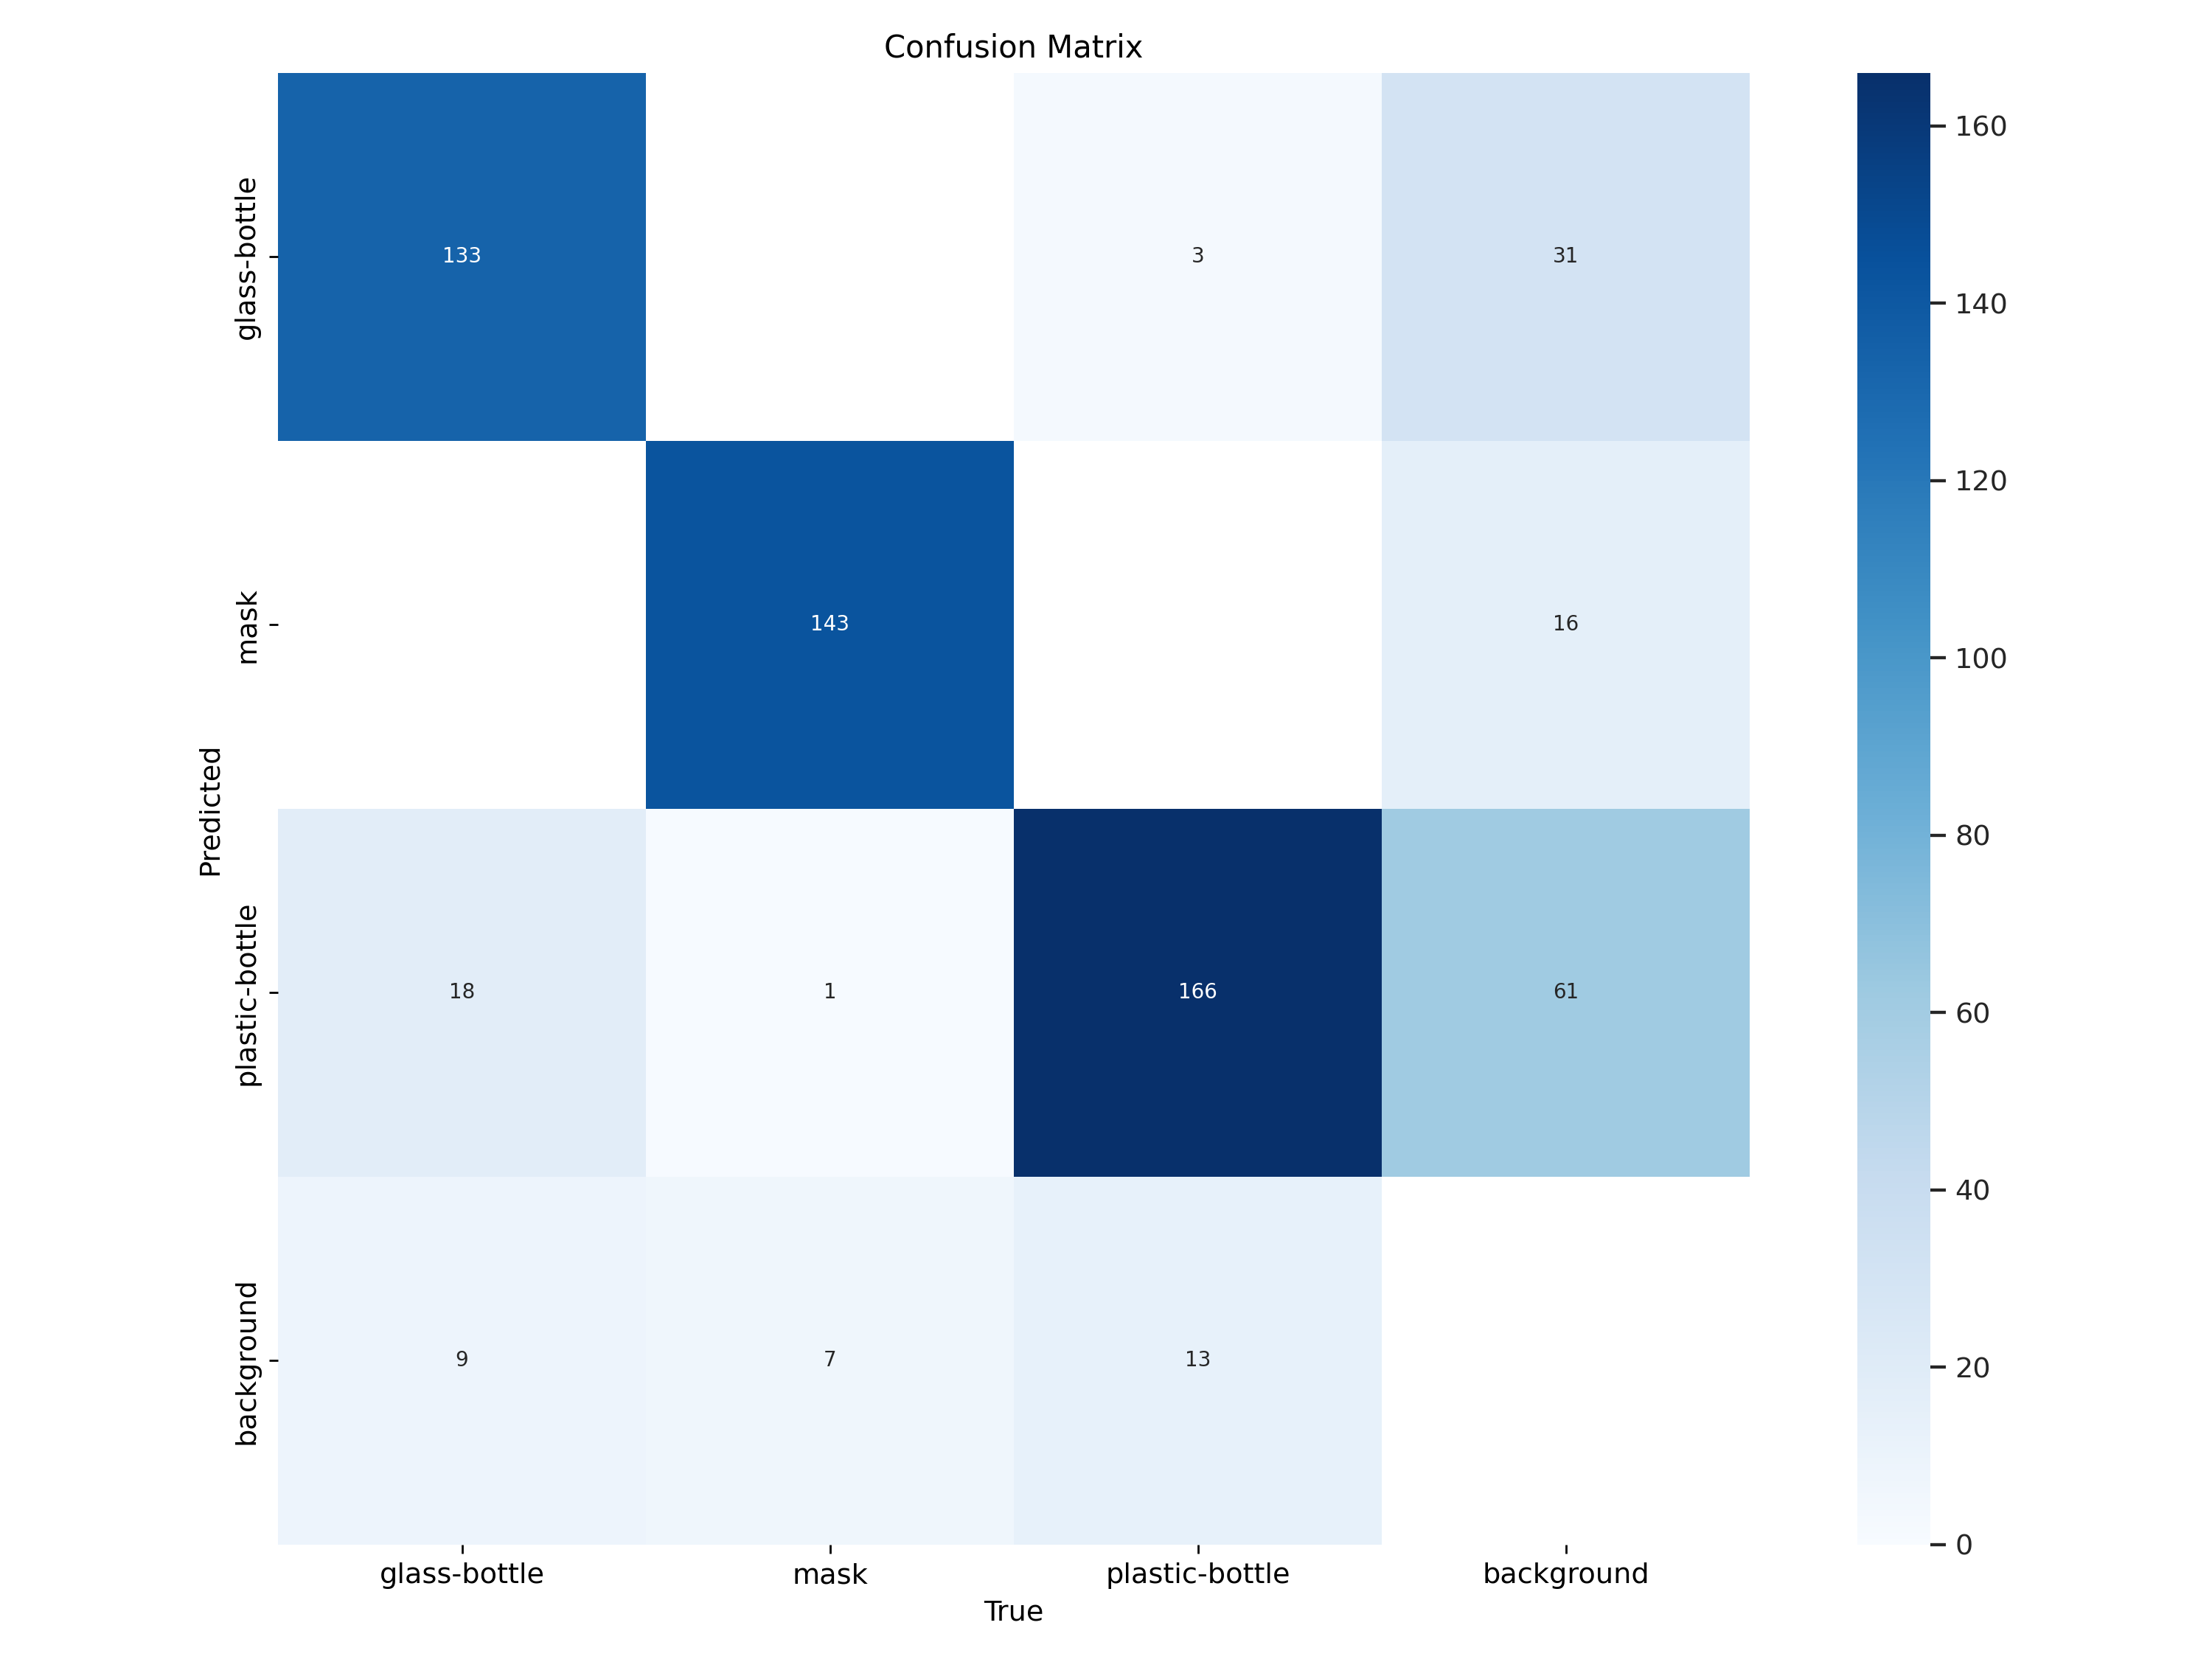

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


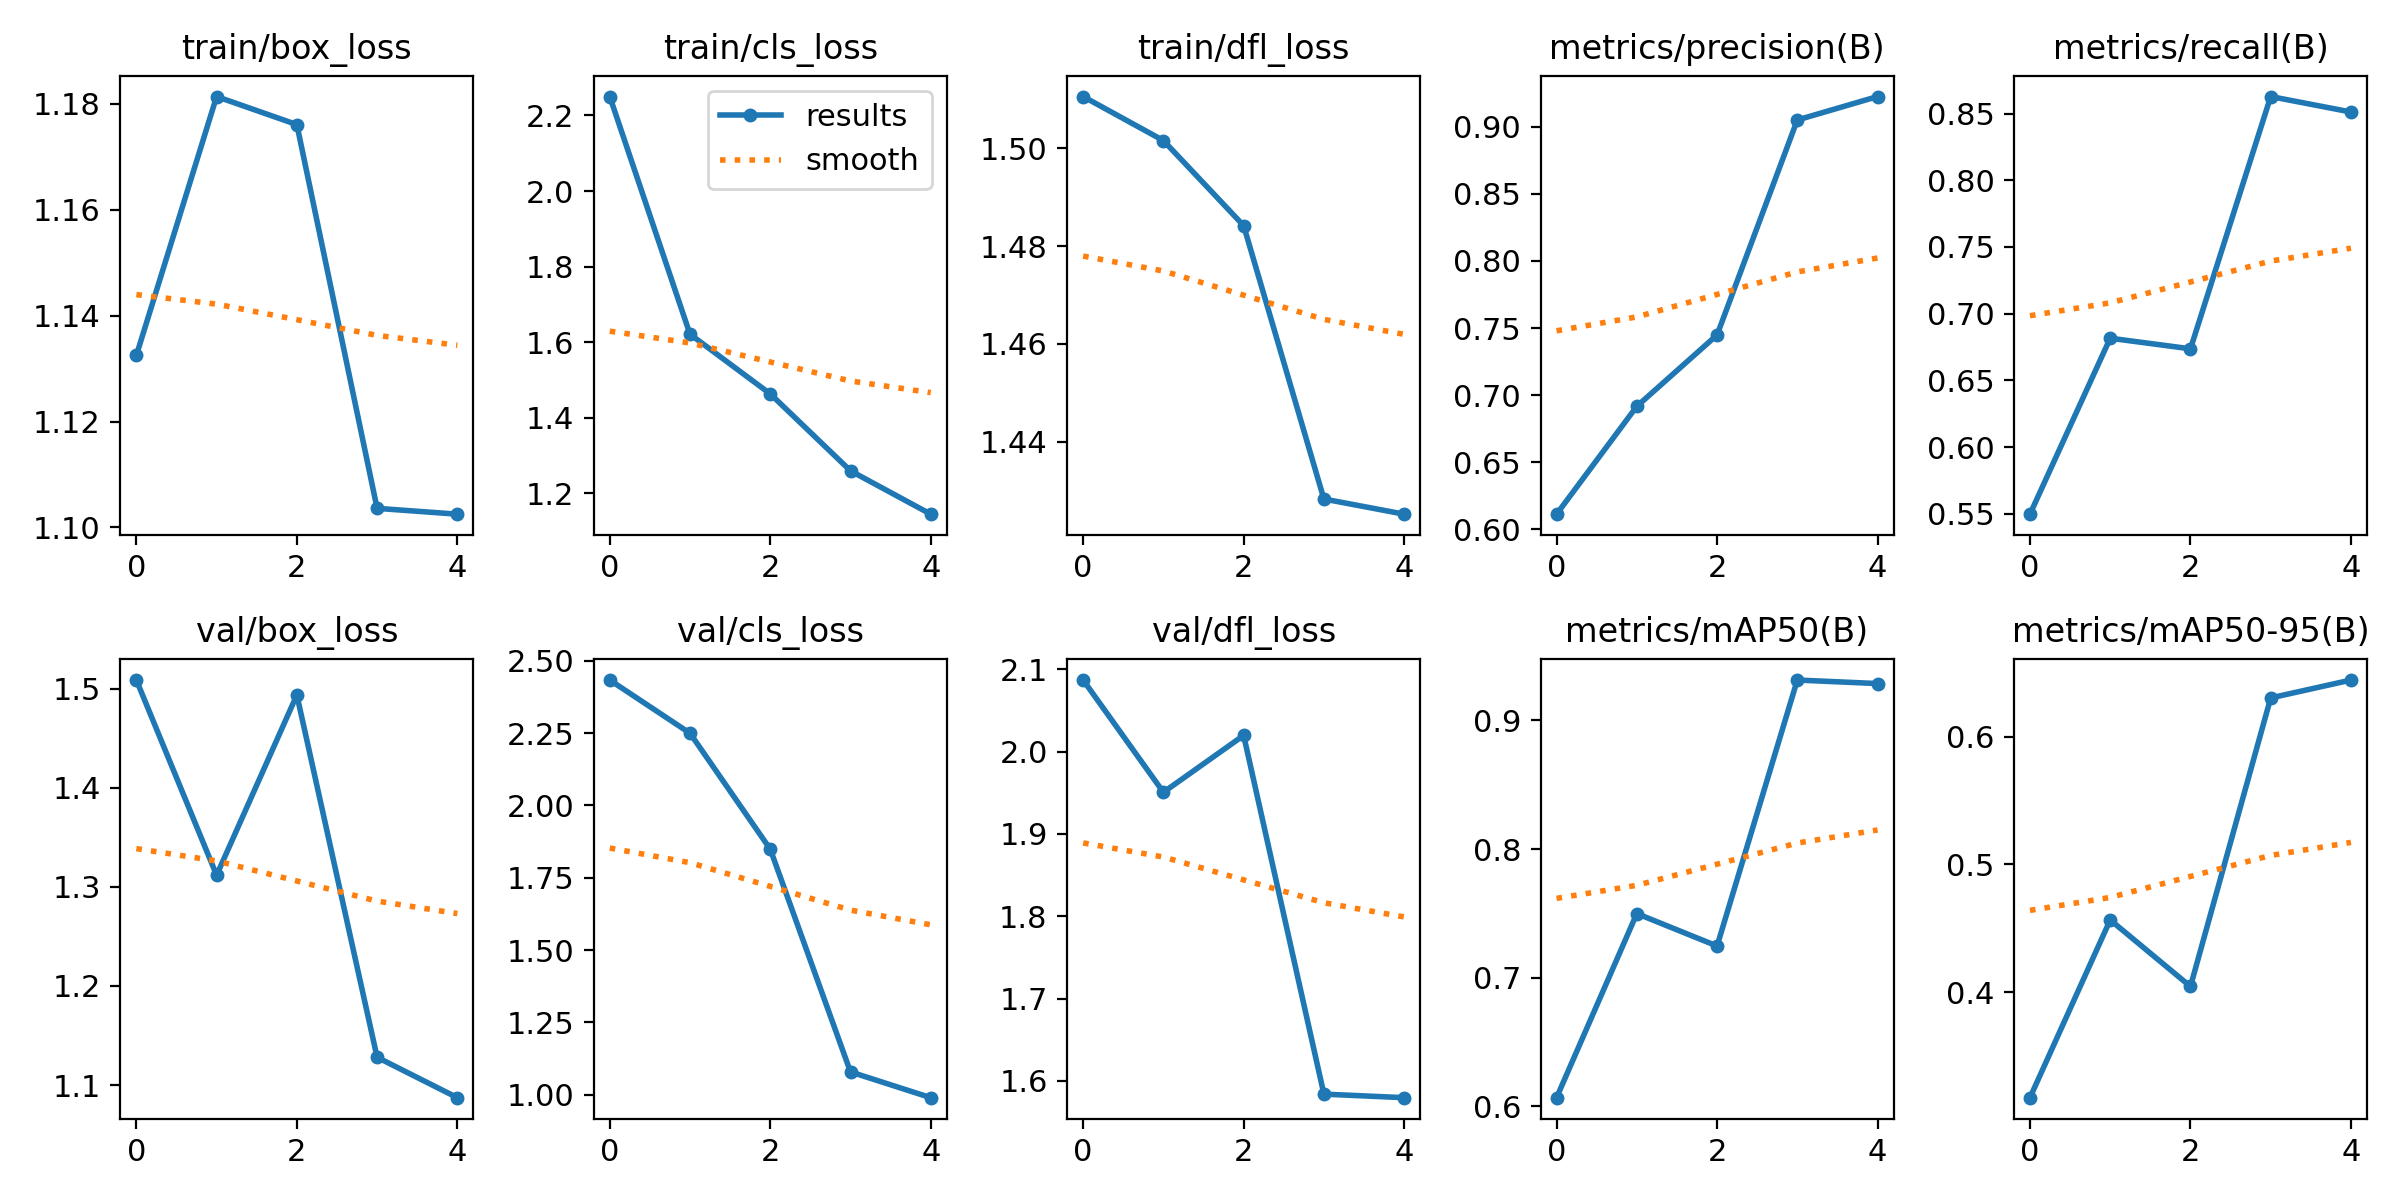

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


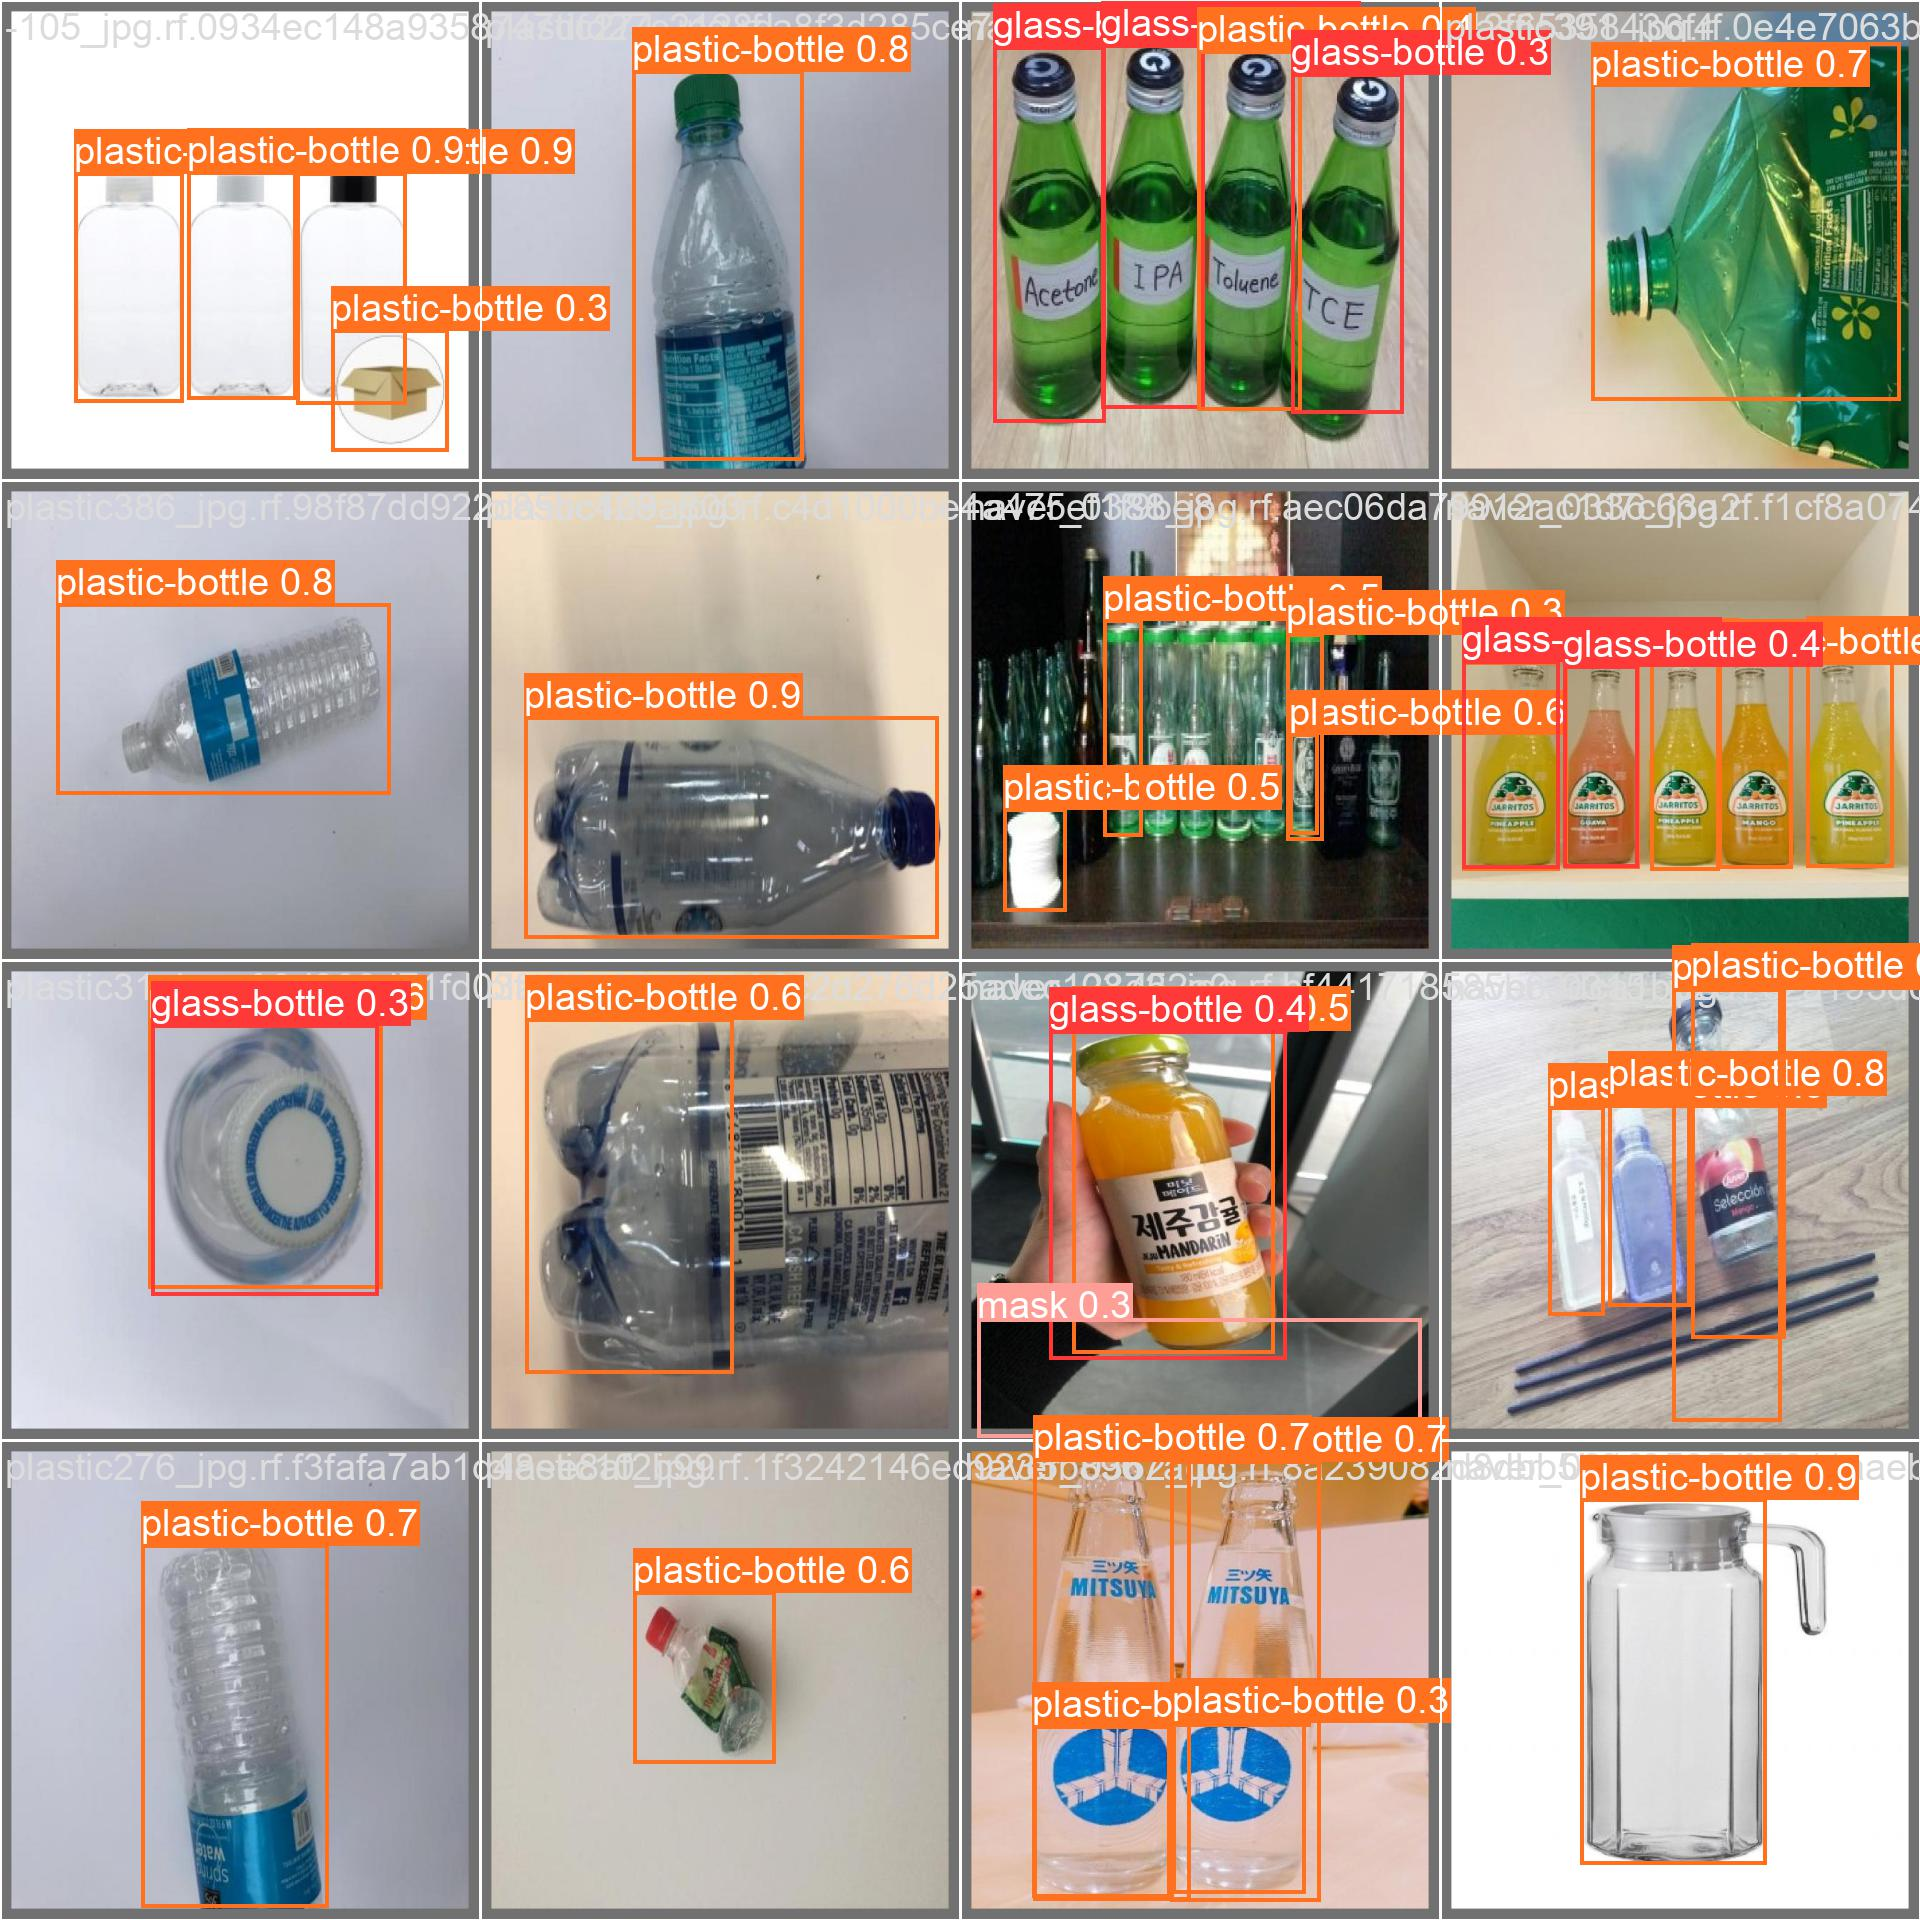

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model
Here, we can run the newly trained model on our validation set, to test if it works well.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")